In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
train_path = "/content/drive/MyDrive/datas/dataset/train"
test_path  = "/content/drive/MyDrive/datas/dataset/val"

In [ ]:
# Tentukan Batch dan ukuran gambar

batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Panggil Dataset Training

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path, image_size=(img_height, img_width), batch_size=batch_size)

Found 138 files belonging to 5 classes.


In [ ]:
# Panggil Dataset Testing

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path, image_size=(img_height, img_width), batch_size=batch_size)

Found 35 files belonging to 5 classes.


In [ ]:
# Menampilkan Jumlah Class dari Dataset Training

class_names = train_ds.class_names
print(class_names)

['ulos pinuncaan', 'ulos ragihidup', 'ulos ragihotang', 'ulos sadum', 'ulos tumtuman']


In [ ]:
# Menampilkan Jumlah Class dari Dataset Testing

print(test_ds.class_names)

['ulos pinuncaan', 'ulos ragihidup', 'ulos ragihotang', 'ulos sadum', 'ulos tumtuman']


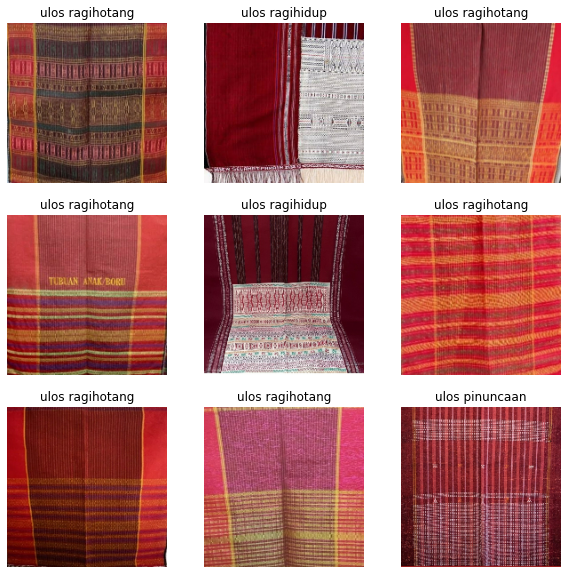

In [ ]:
# Mem-visualisasikan Data Sebelum dilatih

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Bandingkan Ukuran Gambar dengan Label

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
# Caching dataset untuk mempercepat proses pelatihan

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model CNN

In [ ]:
# Tentukan Jumlah kelas

num_classes = len(class_names)

In [ ]:
# Buat Model
model = Sequential([
    # Mencegah overfit dengan mempermainkan gambar
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    # Rescale ukuran dari 0-255 ke 0-1
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional Process
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Berguna untuk mencegah overfit dengan mematikan beberapa filter
    layers.Dropout(0.2),

    # Membuat kumpulan oixel menjadi satu dimensi
    layers.Flatten(),

    # Neural Network layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    # Memprediksi gambar ke sejumlah kelas ['ulos pinuncaan', 'ulos ragihidup', 'ulos ragihotang', 'ulos sadum', 'ulos tumtuman']
    layers.Dense(num_classes)
])

In [ ]:
# Menyusun model dan mengukur kesalahan pengukuran

model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                      

In [ ]:
# Melatih Model dan menyimpan performance model ke dalam variable history

epochs=50
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

Epoch 1/50
5/5 [==============================] - 21s 4s/step - loss: 1.5942 - accuracy: 0.2754 - val_loss: 1.5957 - val_accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 11s 2s/step - loss: 1.5202 - accuracy: 0.3623 - val_loss: 1.4981 - val_accuracy: 0.2571
Epoch 3/50
5/5 [==============================] - 12s 2s/step - loss: 1.3899 - accuracy: 0.4203 - val_loss: 1.6273 - val_accuracy: 0.2857
Epoch 4/50
5/5 [==============================] - 12s 2s/step - loss: 1.3474 - accuracy: 0.4638 - val_loss: 1.3481 - val_accuracy: 0.4571
Epoch 5/50
5/5 [==============================] - 11s 2s/step - loss: 1.1695 - accuracy: 0.5580 - val_loss: 1.3060 - val_accuracy: 0.4000
Epoch 6/50
5/5 [==============================] - 10s 2s/step - loss: 1.1767 - accuracy: 0.5652 - val_loss: 1.2990 - val_accuracy: 0.4000
Epoch 7/50
5/5 [==============================] - 12s 2s/step - loss: 1.1074 - accuracy: 0.6304 - val_loss: 1.1922 - val_accuracy: 0.4000
Epoch 8/50
5/5 [==================

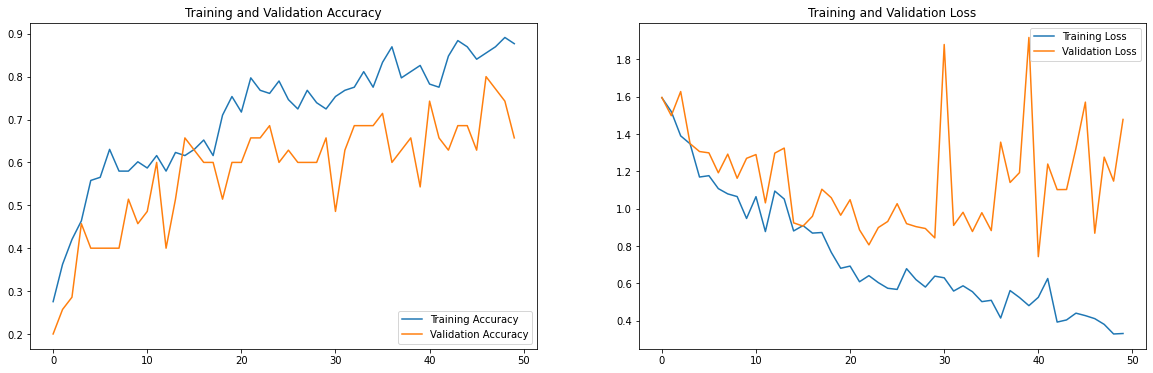

In [ ]:
# Accuracy and Loss Visualization

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

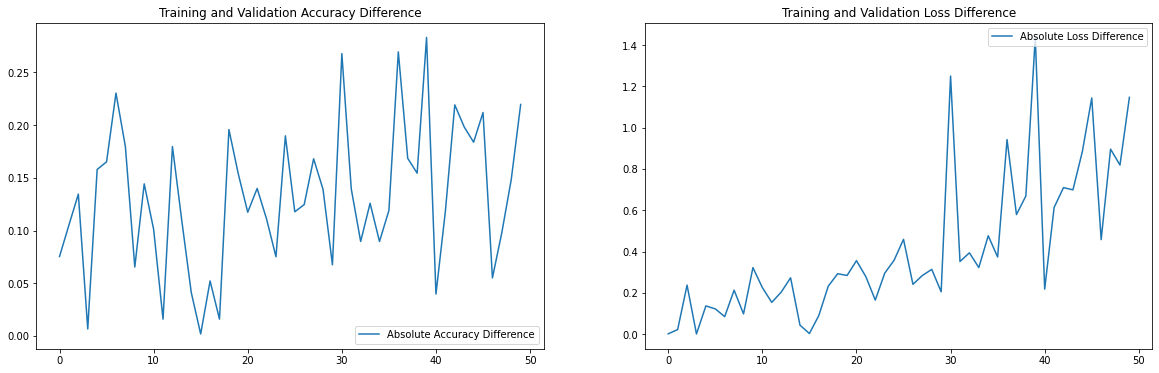

In [ ]:
# Meningkatnya trend perbedaan berarti pelatihan yang cenderung overfitting

acc_difference = abs(np.array(acc) - np.array(val_acc))
loss_difference = abs(np.array(loss) - np.array(val_loss))

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_difference, label='Absolute Accuracy Difference')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy Difference')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_difference, label='Absolute Loss Difference')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss Difference')
plt.show()